In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Lectura del data set utilizando la libreria pandas

In [3]:
# Cargar datos
# data = np.loadtxt(os.path.join('Datasets', 'ex1data2.txt'), delimiter=',')
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/House_Price_dataset.csv')


In [4]:
print(data)

        property_id  location_id  \
0            237062         3325   
1            346905         3236   
2            386513          764   
3            656161          340   
4            841645         3226   
...             ...          ...   
168441     17355248         6754   
168442     17355249          680   
168443     17355250         6757   
168444     17355251         6752   
168445     17355287        10045   

                                                 page_url property_type  \
0       https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat   
1       https://www.zameen.com/Property/e_11_2_service...          Flat   
2       https://www.zameen.com/Property/islamabad_g_15...         House   
3       https://www.zameen.com/Property/islamabad_bani...         House   
4       https://www.zameen.com/Property/dha_valley_dha...         House   
...                                                   ...           ...   
168441  https://www.zameen.com/Property/gu

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

Consultando la informacion del data set nos damos cuenta que varias de las caracteristicas se encuentran en objetos y que algunas le faltan datos para se eso se paso a la transformacion de objeto a numerico

In [6]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [7]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  int64  
 3   property_type  168446 non-null  int64  
 4   price          168446 non-null  int64  
 5   location       168446 non-null  int64  
 6   city           168446 non-null  int64  
 7   province_name  168446 non-null  int64  
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  int64  
 12  purpose        168446 non-null  int64  
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  int64  
 15  agency         168446 non-null  int64  
 16  agent          168446 non-null  int64  
 17  Area Type      168446 non-nul

Para la obtencion de la variable dependiente Y me di cuenta que no se encontraba e la ultima posicion si no que se encontraba en la ultima columna asi que me cree una variable para poder obtener la variable dependiente Y

In [9]:
# En caso de identificar la "y" en otra posicion, no ultima
columnas_seleccionadas = list(range(0, 4)) + list(range(5, 20))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 4]
m = y.size

In [10]:
print(X)
print('-'*26)
print(y)

        property_id  location_id  page_url  property_type  location  city  \
0            237062         3325     66424              1       488     1   
1            346905         3236     52551              1       415     1   
2            386513          764     99193              2       493     1   
3            656161          340     87126              2       211     1   
4            841645         3226     52139              2       351     1   
...             ...          ...       ...            ...       ...   ...   
168441     17355248         6754     82448              2       505     2   
168442     17355249          680     70833              2       505     2   
168443     17355250         6757     82586              2       505     2   
168444     17355251         6752     82357              2       505     2   
168445     17355287        10045     10924              2       201     2   

        province_name   latitude  longitude  baths  area  purpose  bedrooms

In [11]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [12]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

        property_id  location_id  page_url  property_type  location  city  \
0            237062         3325     66424              1       488     1   
1            346905         3236     52551              1       415     1   
2            386513          764     99193              2       493     1   
3            656161          340     87126              2       211     1   
4            841645         3226     52139              2       351     1   
...             ...          ...       ...            ...       ...   ...   
168441     17355248         6754     82448              2       505     2   
168442     17355249          680     70833              2       505     2   
168443     17355250         6757     82586              2       505     2   
168444     17355251         6752     82357              2       505     2   
168445     17355287        10045     10924              2       201     2   

        province_name   latitude  longitude  baths  area  purpose  bedrooms

In [13]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [14]:
print(X)

[[ 1.         -6.8226689  -0.27827946 ...  0.47187904 -0.3274639
  -0.83922161]
 [ 1.         -6.77387582 -0.30184594 ...  0.47187904 -0.05056634
   1.3815897 ]
 [ 1.         -6.75628165 -0.95641155 ...  0.47187904  0.36478
   1.3815897 ]
 ...
 [ 1.          0.78135855  0.63048639 ...  0.47187904  0.64167756
   1.3815897 ]
 [ 1.          0.78135899  0.62916243 ...  0.47187904  0.3301678
   1.3815897 ]
 [ 1.          0.78137499  1.5011222  ...  0.47187904  0.60706536
   1.3815897 ]]


In [15]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [16]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

Primera Prediccion aqui se puede apreciar que la prediccion varia mucho con la prediccion correcta


theta calculado por el descenso por el gradiente: [ 1.77656526e+07 -9.60819586e+05 -2.18841750e+06 -1.48686312e+06
 -1.34897971e+04  2.30150146e+05 -7.79029866e+05  1.05033361e+06
 -1.95962390e+05 -1.62893554e+06 -6.34928594e+05  2.01130861e+06
  1.24840454e+07  4.31901657e+06 -1.08972873e+06 -2.25531363e+05
 -1.35705356e+06 -1.68176648e+07  4.97290484e+06  8.87506474e+05]
El precio predecido para una casa (usando el descenso por el gradiente): $28590679


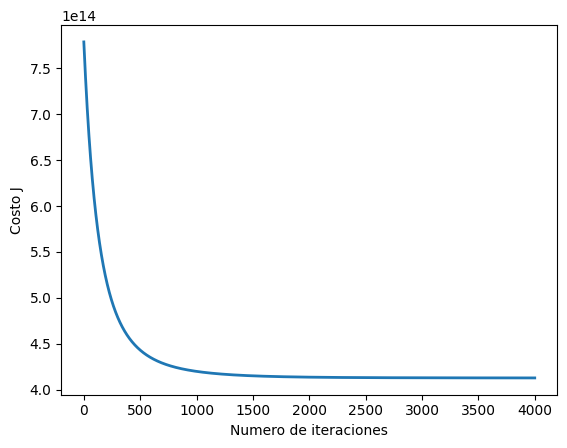

In [17]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003 # alpha = 0.003
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(20)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa
X_array = [1, 841640, 3220, 52130, 2, 350, 1, 0, 33.492590, 73.301330, 3, 305, 1, 3,
           70, 1890, 6260, 1, 8.1, 12]
X_array[1:20] = (X_array[1:20] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para una casa (usando el descenso por el gradiente): ${:.0f}'.format(price))

Segunda Prediccion cambiando algunos datos de la prediccion 1 se pudo observar que las predicciones son muy similares

theta calculado por el descenso por el gradiente: [ 1.77656526e+07 -9.60819586e+05 -2.18841750e+06 -1.48686312e+06
 -1.34897971e+04  2.30150146e+05 -7.79029866e+05  1.05033361e+06
 -1.95962390e+05 -1.62893554e+06 -6.34928594e+05  2.01130861e+06
  1.24840454e+07  4.31901657e+06 -1.08972873e+06 -2.25531363e+05
 -1.35705356e+06 -1.68176648e+07  4.97290484e+06  8.87506474e+05]
El precio predecido para una casa (usando el descenso por el gradiente): $27902095


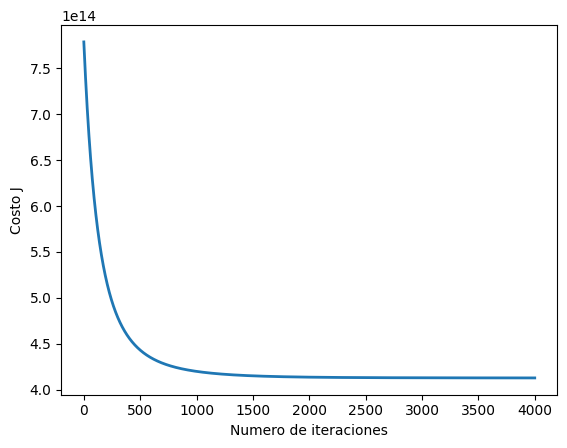

In [18]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003 # alpha = 0.003
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(20)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa
X_array = [1, 840640, 3120, 52120, 2, 340, 1, 0, 33.492090, 73.301530, 3, 303, 1, 3,
           70, 1880, 6250, 1, 7.1, 13]
X_array[1:20] = (X_array[1:20] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para una casa (usando el descenso por el gradiente): ${:.0f}'.format(price))

Tercera prediccion para esta prediccion me centre en la ultima fila dando como resultado que las predicciones son muy similares a la primera y segunda prediccion

theta calculado por el descenso por el gradiente: [ 1.77656526e+07 -9.60819586e+05 -2.18841750e+06 -1.48686312e+06
 -1.34897971e+04  2.30150146e+05 -7.79029866e+05  1.05033361e+06
 -1.95962390e+05 -1.62893554e+06 -6.34928594e+05  2.01130861e+06
  1.24840454e+07  4.31901657e+06 -1.08972873e+06 -2.25531363e+05
 -1.35705356e+06 -1.68176648e+07  4.97290484e+06  8.87506474e+05]
El precio predecido para una casa (usando el descenso por el gradiente): $29177692


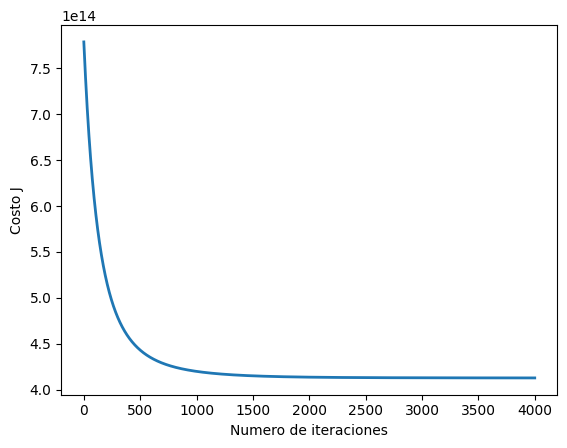

In [19]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003 # alpha = 0.003
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(20)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa
X_array = [1, 17355285, 10040, 10920, 2, 200, 2, 2, 25.113560, 67.353810, 2, 330, 1, 4,
           83, 5650, 860, 1, 9.3, 11]
X_array[1:20] = (X_array[1:20] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para una casa (usando el descenso por el gradiente): ${:.0f}'.format(price))

Cuarta prediccion aqui cambie algunos valores de la tercera prediccion dando como resultado valores de pediccion muy similares a todas las anteriores

theta calculado por el descenso por el gradiente: [ 1.77656526e+07 -9.60819586e+05 -2.18841750e+06 -1.48686312e+06
 -1.34897971e+04  2.30150146e+05 -7.79029866e+05  1.05033361e+06
 -1.95962390e+05 -1.62893554e+06 -6.34928594e+05  2.01130861e+06
  1.24840454e+07  4.31901657e+06 -1.08972873e+06 -2.25531363e+05
 -1.35705356e+06 -1.68176648e+07  4.97290484e+06  8.87506474e+05]
El precio predecido para una casa (usando el descenso por el gradiente): $26562800


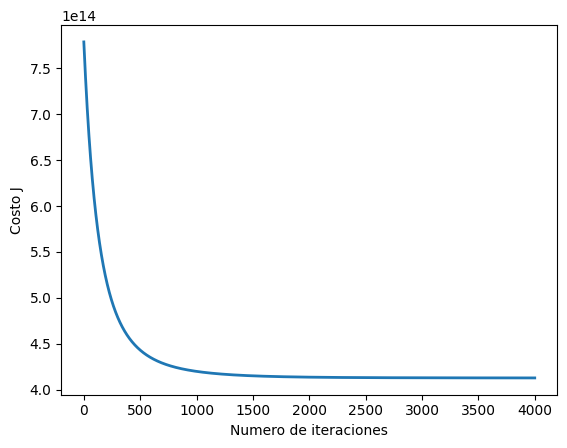

In [20]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003 # alpha = 0.003
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(20)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa
X_array = [1, 17355085, 10140, 10820, 2, 210, 2, 2, 25.114060, 67.353010, 2, 320, 1, 3,
           80, 5050, 840, 1, 8.3, 14]
X_array[1:20] = (X_array[1:20] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para una casa (usando el descenso por el gradiente): ${:.0f}'.format(price))

Ecuacion de la normal
Para la ecuacion de la normal pude darme cuenta que no se podria aplicar ya que m es mayor a los 10000 y que en el data set cuenta con caracteristicas similares.

In [21]:
# Cargar datos
# data = np.loadtxt(os.path.join('Datasets', 'ex1data2.txt'), delimiter=',')
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/House_Price_dataset.csv')


In [22]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [23]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  int64  
 3   property_type  168446 non-null  int64  
 4   price          168446 non-null  int64  
 5   location       168446 non-null  int64  
 6   city           168446 non-null  int64  
 7   province_name  168446 non-null  int64  
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  int64  
 12  purpose        168446 non-null  int64  
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  int64  
 15  agency         168446 non-null  int64  
 16  agent          168446 non-null  int64  
 17  Area Type      168446 non-nul

In [25]:
# En caso de identificar la "y" en otra posicion, no ultima
columnas_seleccionadas = list(range(0, 4)) + list(range(5, 20))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 4]
m = y.size

In [26]:
print(X)
print('-'*26)
print(y)

        property_id  location_id  page_url  property_type  location  city  \
0            237062         3325     66424              1       488     1   
1            346905         3236     52551              1       415     1   
2            386513          764     99193              2       493     1   
3            656161          340     87126              2       211     1   
4            841645         3226     52139              2       351     1   
...             ...          ...       ...            ...       ...   ...   
168441     17355248         6754     82448              2       505     2   
168442     17355249          680     70833              2       505     2   
168443     17355250         6757     82586              2       505     2   
168444     17355251         6752     82357              2       505     2   
168445     17355287        10045     10924              2       201     2   

        province_name   latitude  longitude  baths  area  purpose  bedrooms

In [27]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [28]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [29]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 841640, 3220, 52130, 2, 350, 1, 0, 33.492590, 73.301330, 3, 305, 1, 3,
           70, 1890, 6260, 1, 8.1, 12]
price = np.dot(X_array, theta)

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 17765759.83221924   -917601.62566178  -2302261.96314889
  -1557040.61564753    -35014.34692868    314418.83838284
  -1521762.61267578   3887023.51676433   4431120.14040899
  -3619712.00276074   -564973.42719616   2083959.36754429
  12775258.10480536   4348483.51875257  -1072734.63358663
   -209201.54592194  -1367823.80342894 -17041455.34091203
   5054372.33497811    859428.00924539]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $-869201856352


Despues de la ejecucion de la ecuacion de la normal me di cuenta que los resultados me salen muy incoherentes que es por que no cumplio con los requerimietos que debe tener para la ecuacion de la normal